## to experiment with code example go to https://github.com/ageron/handson-ml
## to learn python go to http://learnpython.org/

## Roadmap

<p style="font-size:18px;">
This book is organized in two parts. Part I, The Fundamentals of Machine Learning, covers the following topics:
    
■ What is Machine Learning? What problems does it try to solve? What are the main categories and fundamental concepts of Machine Learning systems?
    
■The main steps in a typical Machine Learning project.

Learning by fitting a model to data.

■ Optimizing a cost function.

■ Handling, cleaning, and preparing data.

■ Selecting and engineering features.

■ Selecting a model and tuning hyperparameters using cross-validation.

■ The main challenges of Machine Learning, in particular underfitting and overfitting (the bias/variance tradeoff).

■ Reducing the dimensionality of the training data to fight the curse of dimensionality.

■ The most common learning algorithms: Linear and Polynomial Regression, Logistic Regression, k- Nearest Neighbors, Support Vector Machines, Decision Trees, Random Forests, and Ensemble methods.

## Part II, Neural Networks and Deep Learning, covers the following topics:

■ What are neural nets? What are they good for?

■ Building and training neural nets using TensorFlow.

■ The most important neural net architectures: feedforward neural nets, convolutional nets, recurrent nets, long short-term memory (LSTM) nets, and autoencoders.

Techniques for training deep neural nets.

■ Scaling neural networks for huge datasets.

■ Reinforcement learning.

The first part is based mostly on Scikit-Learn while the second part uses TensorFlow.


## CAUTION

Don't jump into deep waters too hastily: while Deep Learning is no doubt one of the most exciting areas in Machine Learning, you should master the fundamentals first. Moreover, most problems can be solved quite well using simpler techniques such as Random Forests and Ensemble methods (discussed in Part I). Deep Learning is best suited for complex problems such as image recognition, speech recognition, or natural language processing, provided you have enough data, computing power, and patience.

</p>

## Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:

■ Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)

■ Whether or not they can learn incrementally on the fly (online versus batch learning)

■ Whether they work by simply comparing new data points to known data points, or instead detect patterns in the training data and build a predictive model, much like scientists do (instance-based versus model-based learning)

These criteria are not exclusive; you can combine them in any way you like. For example, a state-of-the- art spam filter may learn on the fly using a deep neural network model trained using examples of spam and ham; this makes it an online, model-based, supervised learning system.
Let's look at each of these criteria a bit more closely.



## Supervised/Unsupervised Learning

<p style="font-size:18px;">    
Machine Learning systems can be classified according to the amount and type of supervision they get during training. There are four major categories: supervised learning, unsupervised learning, semisupervised learning, and Reinforcement Learning.
Supervised learning
In supervised learning, the training data you feed to the algorithm includes the desired solutions, called labels (Figure 1-5).

<p style="font-size:18px;"> 
A typical supervised learning task is classification. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn how to classify new emails.
Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called regression (Figure 1-6).1 To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices).

<p style="font-size:18px;"> 
NOTE
In Machine Learning an attribute is a data type (e.g., “Mileage"), while a feature has several meanings depending on the context, but generally means an attribute plus its value (e.g., "Mileage = 15,000"). Many people use the words attribute and feature interchangeably, though.

<p style="font-size:18px;"> 
Note that some regression algorithms can be used for classification as well, and vice versa. For example, Logistic Regression is commonly used for classification, as I can output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).
Here are some of the most important supervised learning algorithms (covered in this book):
    
<p style="font-size:18px;"> 
■k-Nearest Neighbors
Linear Regression
·
Logistic Regression
·
Support Vector Machines (SVMs)

■ Decision Trees and Random Forests

■ Neural networks2



## Unsupervised learning

In unsupervised learning, as you might guess, the training data is unlabeled (Figure 1-7). The system tries to learn without a teacher.


Here are some of the most important unsupervised learning algorithms (we will cover dimensionality reduction in Chapter 8):

■ Clustering

k-Means

Hierarchical Cluster Analysis (HCA)

Expectation Maximization

■ Visualization and dimensionality reduction

Principal Component Analysis (PCA)

Kernel PCA

Locally-Linear Embedding (LLE)

t-distributed Stochastic Neighbor Embedding (t-SNE)

■ Association rule learning

Apriori

Eclat
<p style="font-size:18px;"> 
For example, say you have a lot of data about your blog's visitors. You may want to run a clustering algorithm to try to detect groups of similar visitors (Figure 1-8). At no point do you tell the algorithm which group a visitor belongs to: it finds those connections without your help. For example, it might notice that 40% of your visitors are males who love comic books and generally read your blog in the evening, while 20% are young sci-fi lovers who visit during the weekends, and so on. If you use a hierarchical clustering algorithm, it may also subdivide each group into smaller groups. This may help you target your posts for each group.



<p style="font-size:18px;">
In this chapter, you will go through an example project end to end, pretending to be a recently hired data scientist in a real estate company.1 Here are the main steps you will go through:
    
1. Look at the big picture.    
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.
</p>


## Look at the Big Picture
<p style="font-size:18px;">
Welcome to Machine Learning Housing Corporation! The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them "districts" for short. Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.
</p>


## Frame the Problem
<p style="font-size:18px;">
The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. How does the company expect to use and benefit from this model? This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it. Your boss answers that your model's output (a prediction of a district's median housing price) will be fed to another Machine Learning system (see Figure 2-2), along with many other signals.3 This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.
</p>

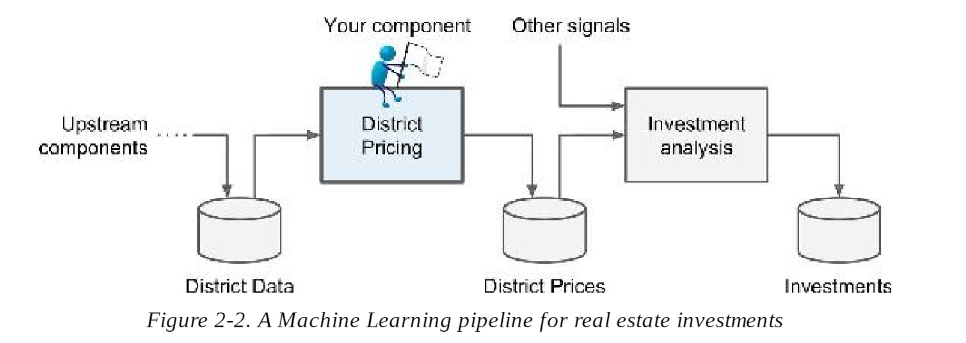

##                                                                PIPELINES
<p style="font-size:18px;">
A sequence of data processing components is called a data pipeline. Pipelines are very common in Machine Learning systems, since there is a lot of data to manipulate and many data transformations to apply.
Components typically run asynchronously. Each component pulls in a large amount of data, processes it, and spits out the result in another data store, and then some time later the next component in the pipeline pulls this data and spits out its own output, and so on. Each component is fairly self-contained: the interface between components is simply the data store. This makes the system quite simple to grasp (with the help of a data flow graph), and different teams can focus on different components. Moreover, if a component breaks down, the downstream components can often continue to run normally (at least for a while) by just using the last output from the broken component. This makes the architecture quite robust.
On the other hand, a broken component can go unnoticed for some time if proper monitoring is not implemented. The data gets stale and the overall system's performance drops.
</p>

<p style="font-size:18px;">
The next question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 10%. This is why the company thinks that it would be useful to train a model to predict a district's median housing price given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data. Okay, with all this information you are now ready to start designing your system. First, you need to frame
</p>

<p style="font-size:18px;">
the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques? Before you read on, pause and try to answer these questions for yourself.
Have you found the answers? Let's see: it is clearly a typical supervised learning task since you are given labeled training examples (each instance comes with the expected output, i.e., the district's median housing price). Moreover, it is also a typical regression task, since you are asked to predict a value. More specifically, this is a multivariate regression problem since the system will use multiple features to make a prediction (it will use the district's population, the median income, etc.). In the first chapter, you predicted life satisfaction based on just one feature, the GDP per capita, so it was a univariate regression problem. Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.
</p>

## TIP
<p style="font-size:18px;">
If the data was huge, you could either split your batch learning work across multiple servers (using the MapReduce technique, as we will see later), or you could use an online learning technique instead.
</p>

## Select a Performance Measure

<p style="font-size:18px;">
Your next step is to select a performance measure. A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors. Equation 2-1 shows the mathematical formula to compute the RMSE.
</p>

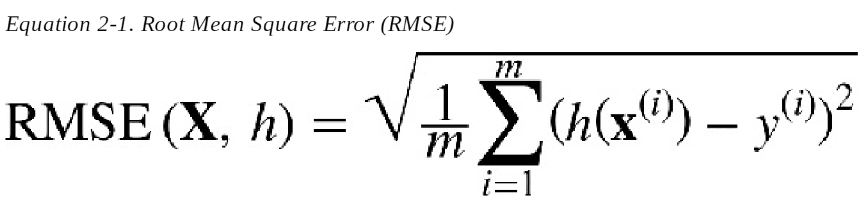

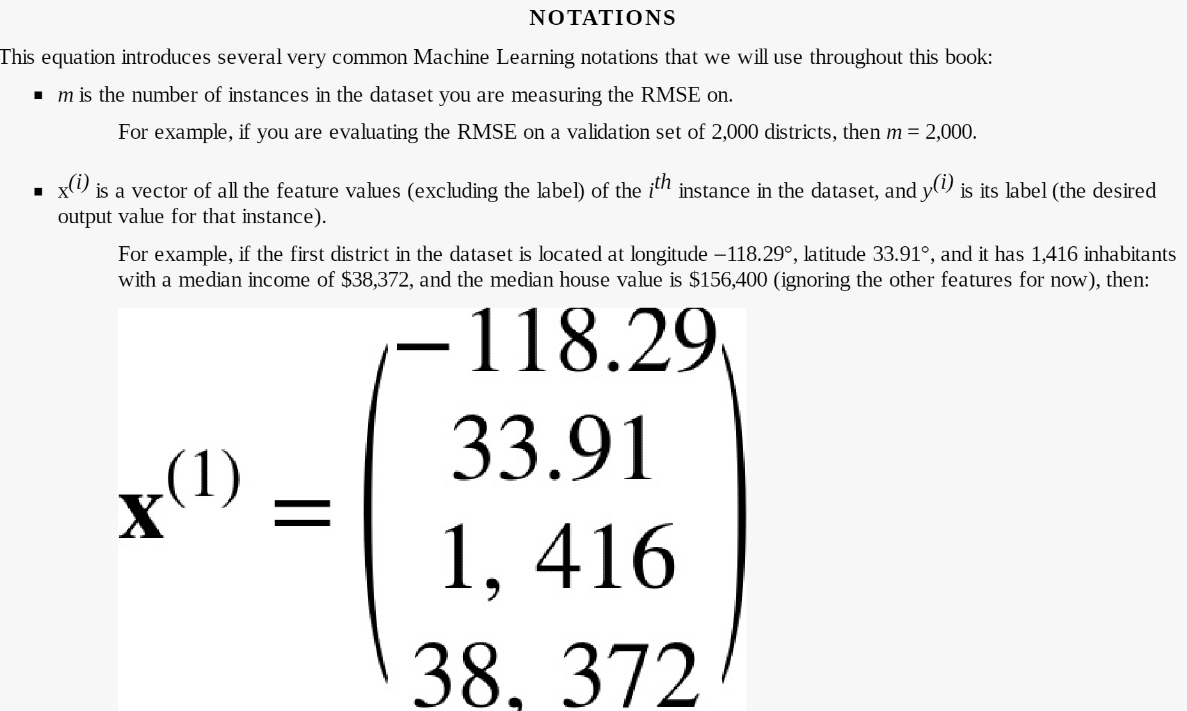

<img src="Screenshot 2024-10-11 173140.jpg" width=1000>

Answer the following questions:
1. How would you define Machine Learning?

Machine Learning is the science (and art) of programming computers so they can learn from data. Here is a slightly more general definition:
[Machine Learning is the] field of study that gives computers the ability to learn without being explicitly programmed.
   
2. Can you name four types of problems where it shines?


3. What is a labeled training set?


4. What are the two most common supervised tasks?

 
5. Can you name four common unsupervised tasks?

 
6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

 
7. What type of algorithm would you use to segment your customers into multiple groups?


8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?


9. What is an online learning system?
